### SGD(stochastic gradient descent) : 確率的勾配降下法

In [1]:
class SGD:
    def __init__(self, lr=0.01) -> None:
        self.lr = lr

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

        return params

### Momentum : 運動量
Momentumはボールが地面を転がり落ちるようなイメージを持ったアルゴリズム

$ v \leftarrow \alpha v - \eta \frac{\delta L}{\delta W} $

$ W \leftarrow W + v $

In [2]:
import numpy as np


class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum  # \alpha
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] -= self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

        return params

### AdaGrad
AdaGradは学習が進むにつれて、学習係数を小さくすることで、目的値の近くでは細かく勾配計算を行えるようにするアルゴリズム

$ h \leftarrow \frac{\delta L}{\delta W} \bigodot \frac{\delta L}{\delta W} $

$ W \leftarrow W - \eta \frac{1}{\sqrt{h}} \frac{\delta L}{\delta W} $

In [4]:
from math import sqrt


class AdaGrad:

    def __init__(self, lr=0.01) -> None:
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * (grads[key] / (np.sqrt(self.h[key]) + 1e-7))

        return params

### 隠れ層のアクティベーション分布

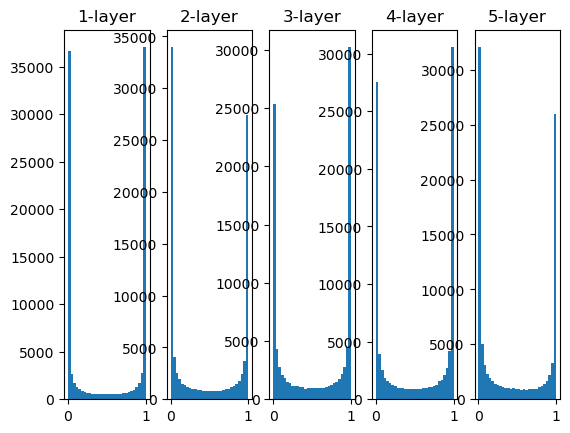

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.random.randn(1000, 100)  # 1000個のデータ

node_num = 100  # 各隠れ層のノード(ニューロン)の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i - 1]

    w = np.random.randn(node_num, node_num)

    z = np.dot(x, w)
    a = sigmoid(z)  # シグモイド関数 -> 活性化関数
    activations[i] = a

# ヒストグラムを表示
for i, a in activations.items():
    plt.subplot(1, len(activations), i + 1)
    plt.title(str(i + 1) + "-layer")
    plt.hist(a.flatten(), 30, range=(0, 1))
plt.show()

epoch:0, train acc:0.08333333333333333, test acc:0.0856
epoch:1, train acc:0.09333333333333334, test acc:0.0803
epoch:2, train acc:0.11, test acc:0.0854
epoch:3, train acc:0.14, test acc:0.096
epoch:4, train acc:0.16, test acc:0.1051
epoch:5, train acc:0.16333333333333333, test acc:0.1234
epoch:6, train acc:0.19666666666666666, test acc:0.1392
epoch:7, train acc:0.25333333333333335, test acc:0.1559
epoch:8, train acc:0.27666666666666667, test acc:0.1753
epoch:9, train acc:0.3, test acc:0.1957
epoch:10, train acc:0.31333333333333335, test acc:0.2077
epoch:11, train acc:0.33, test acc:0.2182
epoch:12, train acc:0.38, test acc:0.2316
epoch:13, train acc:0.3933333333333333, test acc:0.2446
epoch:14, train acc:0.42, test acc:0.2531
epoch:15, train acc:0.44666666666666666, test acc:0.2636
epoch:16, train acc:0.48333333333333334, test acc:0.2861
epoch:17, train acc:0.52, test acc:0.3017
epoch:18, train acc:0.5233333333333333, test acc:0.3129
epoch:19, train acc:0.56, test acc:0.3262
epoch:20,

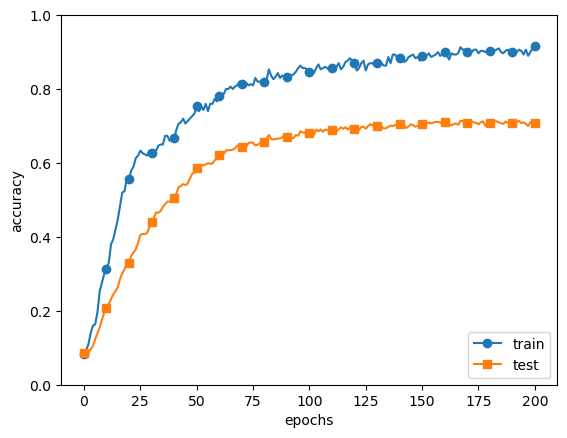

In [3]:
import os, sys

sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decoy (加重減衰)の設定
# weight_decoy_lambda = 0 # weight decay
weight_decay_lambda = 0.1
network = MultiLayerNet(
    input_size=784,
    hidden_size_list=[100, 100, 100, 100, 100, 100],
    output_size=10,
    weight_decay_lambda=weight_decay_lambda,
)

optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0  # 何エポック学習を行ったのかを計算する

# 学習フェーズ
for i in range(10000000000):
    # サンプルをバッチサイズ分抜き取る処理
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 勾配を求める処理
    grads = network.gradient(x_batch, t_batch)
    # 学習率0.01で確率的勾配降下法を使用する
    optimizer.update(network.params, grads)

    # epoch数がiter_per_epochなったら、現在のモデルの精度を計算する
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print(
            "epoch:"
            + str(epoch_cnt)
            + ", train acc:"
            + str(train_acc)
            + ", test acc:"
            + str(test_acc)
        )

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# グラフの描写
markers = {"train": "o", "test": "s"}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker="o", label="train", markevery=10)
plt.plot(x, test_acc_list, marker="s", label="test", markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc="lower right")
plt.show()